
## Step 1: Reading the data

1. Go to [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)
2. If you scroll down the page a bit, you'll see a data dictionary explaining each of the columns. Take a minute to familiarize yourself with how the csv is structured.
4. Download the `train.csv` file into this lab folder.
3. Create an iPython notebook and load the csv into pandas.


In [1]:
#Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load data in dataframe
ttn = pd.read_csv('train.csv')

In [3]:
ttn.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Find the average age of those who survived and those who did not
ttn.groupby('Survived')[['Age']].agg(['mean'])

,Age
,mean
Survived,
0,30.626179
1,28.343690



## Step 2: Cleaning the data
1. Create a bar chart showing how many missing values are in each column
  - *Bonus* : Theres a good library for visualizing missing values called Missingno.
      - [Install Instructions](https://pypi.org/project/missingno/)
      - [Usage Documentation](https://github.com/ResidentMario/missingno)
2. Which column has the most `NaN` values? How many cells in that column are empty?
3. Delete all rows where `Embarked` is empty
4. Fill all empty cabins with **¯\\_(ツ)_/¯**

Note: `NaN`, empty, and missing are synonymous.

In [5]:
ttn_na = ttn.isnull().sum()

<AxesSubplot:>

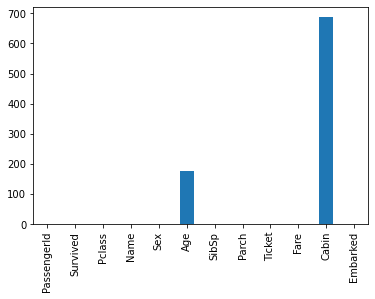

In [6]:
ttn_na.plot(kind='bar')

__2. Which column has the most `NaN` values? How many cells in that column are empty?__

In [7]:
ttn_na

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

__3. Delete all rows where `Embarked` is empty__

In [8]:
ttn_2 = ttn.loc[ttn['Embarked'].notnull(), :]

In [9]:
ttn_2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

__4. Fill all empty cabins with **¯\\_(ツ)_/¯**__

In [10]:
#Your code here 
ttn_2['Cabin'] = ttn_2['Cabin'].fillna('¯\(ツ)/¯')

/var/folders/s9/swv_w1zd6cdfjmwpdh_tnv1r0000gn/T/ipykernel_10987/4273922821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttn_2['Cabin'] = ttn_2['Cabin'].fillna('¯\(ツ)/¯')


In [11]:
#Your code here 
ttn_2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

## Step 3: Feature extraction
1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.
2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
  - Familiarize yourself with the [`pd.get_dummies` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - BONUS: Extract the title from everyone's name and create dummy columns

__1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.__

In [12]:
#Your code here 
ttn_2['FamilyCount'] = ttn_2['SibSp'] + ttn_2['Parch']

/var/folders/s9/swv_w1zd6cdfjmwpdh_tnv1r0000gn/T/ipykernel_10987/1398621266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttn_2['FamilyCount'] = ttn_2['SibSp'] + ttn_2['Parch']


In [13]:
ttn_2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0


__2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.__

In [14]:
ttn_2.loc[ttn_2['Name'].str.contains('Rev'), :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.000,¯\(ツ)/¯,S,0
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.525,¯\(ツ)/¯,S,0
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.000,¯\(ツ)/¯,S,1
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.350,¯\(ツ)/¯,Q,0
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.000,¯\(ツ)/¯,S,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,¯\(ツ)/¯,S,0


In [15]:
ttn_2['Name'].str.contains('Rev')

0      False
1      False
2      False
3      False
4      False
       ...  
886     True
887    False
888    False
889    False
890    False
Name: Name, Length: 889, dtype: bool

In [16]:
ttn_2['IsReverend'] = ttn_2['Name'].str.contains('Rev').map(lambda x: 1 if x == True else 0)
ttn_2.head()

/var/folders/s9/swv_w1zd6cdfjmwpdh_tnv1r0000gn/T/ipykernel_10987/374113081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttn_2['IsReverend'] = ttn_2['Name'].str.contains('Rev').map(lambda x: 1 if x == True else 0)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0


In [17]:
ttn_2['IsReverend'].value_counts()

0    883
1      6
Name: IsReverend, dtype: int64

__3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`__

Create 3 columns: Embarked_C, Embarked_Q and Embarked_S. These columns will have 1's and 0's that correspond to the C, Q and S values in the Embarked column

In [18]:
ttn_3 = pd.get_dummies(ttn_2,columns=['Embarked'])

Do the same thing for Sex

In [19]:
ttn_3 = pd.get_dummies(ttn_3,columns=['Sex'])

In [20]:
ttn_3.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,1,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,0,0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,¯\(ツ)/¯,0,0,0,0,1,0,1


__BONUS: Extract the title from everyone's name and create dummy columns__

In [21]:
ttn_3['Titles'] = ttn_3['Name'].str.extract(pat=", ([\w ]+).")#(r', (\w+).')

In [22]:
ttn_3['Titles'].value_counts()

Mr              517
Miss            181
Mrs             124
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Titles, dtype: int64

In [23]:
ttn_3 = pd.get_dummies(ttn_3,columns=['Titles'])

In [24]:
ttn_3.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Titles_Master,Titles_Miss,Titles_Mlle,Titles_Mme,Titles_Mr,Titles_Mrs,Titles_Ms,Titles_Rev,Titles_Sir,Titles_the Countess
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,...,0,0,0,0,1,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,...,0,0,0,0,0,1,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,...,0,1,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,...,0,0,0,0,0,1,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,¯\(ツ)/¯,...,0,0,0,0,1,0,0,0,0,0


## Step 4: Exploratory analysis 
_[`df.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) may be very useful._

1. What was the survival rate overall?
2. Which gender fared the worst? What was their survival rate?
3. What was the survival rate for each `Pclass`?
4. Did any reverends survive? How many?
5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**
6. What is the survival rate for people whose `Age` is empty?
7. What is the survival rate for each port of embarkation?
8. What is the survival rate for children (under 12) in each `Pclass`?
9. Did the captain of the ship survive? Is he on the list?
10. Of all the people that died, who had the most expensive ticket? How much did it cost?
11. Does having family on the boat help or hurt your chances of survival?

__1. What was the survival rate overall?__

In [25]:
ttn['Survived'].mean()

0.3838383838383838

__2. Which gender fared the worst? What was their survival rate?__

In [26]:
ttn.groupby('Sex')[['Survived']].agg(['mean'])

,Survived
,mean
Sex,
female,0.742038
male,0.188908


__3. What was the survival rate for each `Pclass`?__

In [27]:
ttn.groupby('Pclass')[['Survived']].agg(['mean'])

,Survived
,mean
Pclass,
1,0.629630
2,0.472826
3,0.242363


__4. Did any reverends survive? How many?__

In [28]:
ttn_3.groupby('IsReverend')[['Survived']].agg(['sum'])

,Survived
,sum
IsReverend,
0,340
1,0


__5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**__

In [29]:
ttn_2.groupby('Cabin')[['Survived']].agg(['mean']).tail(1)

,Survived
,mean
Cabin,
¯\(ツ)/¯,0.299854


__6. What is the survival rate for people whose `Age` is empty?__

In [30]:
ttn_age_na = ttn.loc[ttn['Age'].isnull(), :]

In [31]:
ttn_age_na['Survived'].mean()

0.2937853107344633

__7. What is the survival rate for each port of embarkation?__

In [32]:
ttn.groupby('Embarked')[['Survived']].agg(['mean'])

,Survived
,mean
Embarked,
C,0.553571
Q,0.389610
S,0.336957


__8. What is the survival rate for children (under 12) in each `Pclass`?__

In [33]:
ttn_age_12 = ttn[ttn['Age'] < 12.0]

In [34]:
ttn_age_12.groupby('Pclass')[['Survived']].agg(['mean'])

,Survived
,mean
Pclass,
1,0.750000
2,1.000000
3,0.404255


__9. Did the captain of the ship survive? Is he on the list?__

In [35]:
ttn_3.groupby('Titles_Capt')[['Survived']].agg(['sum'])

,Survived
,sum
Titles_Capt,
0,340
1,0


__10. Of all the people that died, who had the most expensive ticket? How much did it cost?__

In [36]:
ttn.loc[ttn['Survived'] == 0, ['Name', 'Fare']].sort_values(by='Fare', ascending=False).head(2)

,Name,Fare
27,"Fortune, Mr. Charles Alexander",263.0
438,"Fortune, Mr. Mark",263.0


__11. Does having family on the boat help or hurt your chances of survival?__

In [37]:
ttn_2.loc[ttn_2['FamilyCount'] == 0, ['Survived']].mean()

Survived    0.300935
dtype: float64

In [38]:
ttn_2.loc[ttn_2['FamilyCount'] != 0, ['Survived']].mean()

Survived    0.50565
dtype: float64

## Step 5: Plotting
Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.


In [39]:
ttn_2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0


In [40]:
ttn_2.Age.sort_values()

803    0.42
755    0.67
644    0.75
469    0.75
831    0.83
       ... 
859     NaN
863     NaN
868     NaN
878     NaN
888     NaN
Name: Age, Length: 889, dtype: float64

In [41]:
ttn_age = ttn_2.dropna()

In [42]:
ttn_age.Age.sort_values()

803     0.42
755     0.67
644     0.75
469     0.75
831     0.83
       ...  
116    70.50
493    71.00
96     71.00
851    74.00
630    80.00
Name: Age, Length: 712, dtype: float64

/var/folders/s9/swv_w1zd6cdfjmwpdh_tnv1r0000gn/T/ipykernel_10987/3500516130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttn_age['Age']=pd.cut(ttn_age.Age,[0,12,21,55,81])


<AxesSubplot:xlabel='Age'>

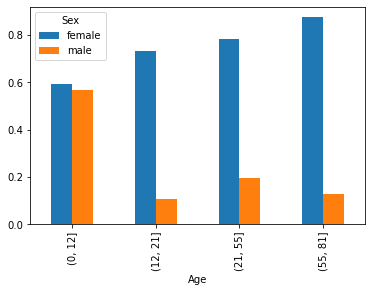

In [43]:
ttn_age['Age']=pd.cut(ttn_age.Age,[0,12,21,55,81])
ttn_age.pivot_table(values='Survived',index='Age',columns='Sex').plot.bar()

In [44]:
ttn_age.Fare.sort_values().unique()

array([  0.    ,   4.0125,   5.    ,   6.2375,   6.4375,   6.45  ,
         6.4958,   6.75  ,   6.975 ,   7.0458,   7.05  ,   7.0542,
         7.125 ,   7.1417,   7.225 ,   7.2292,   7.25  ,   7.4958,
         7.5208,   7.55  ,   7.65  ,   7.7333,   7.7417,   7.75  ,
         7.775 ,   7.7958,   7.8   ,   7.8542,   7.875 ,   7.8792,
         7.8875,   7.8958,   7.925 ,   8.0292,   8.05  ,   8.1583,
         8.3   ,   8.3625,   8.4042,   8.4333,   8.5167,   8.6542,
         8.6625,   8.6833,   8.85  ,   9.    ,   9.2167,   9.225 ,
         9.35  ,   9.475 ,   9.4833,   9.5   ,   9.5875,   9.825 ,
         9.8375,   9.8417,   9.8458,  10.1708,  10.4625,  10.5   ,
        10.5167,  11.1333,  11.2417,  11.5   ,  12.    ,  12.275 ,
        12.2875,  12.35  ,  12.475 ,  12.525 ,  12.65  ,  12.875 ,
        13.    ,  13.4167,  13.5   ,  13.7917,  13.8583,  14.    ,
        14.1083,  14.4   ,  14.4542,  14.4583,  14.5   ,  15.    ,
        15.0458,  15.2458,  15.5   ,  15.55  ,  15.7417,  15.7

/var/folders/s9/swv_w1zd6cdfjmwpdh_tnv1r0000gn/T/ipykernel_10987/2494000756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttn_age['Fare']=pd.cut(ttn_age.Fare,[0,50,125,250,513])


<AxesSubplot:xlabel='Fare'>

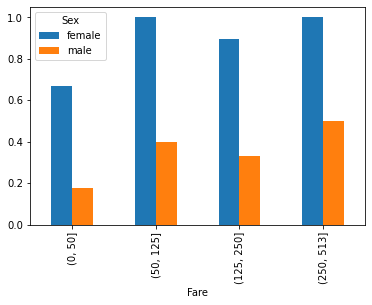

In [45]:
ttn_age['Fare']=pd.cut(ttn_age.Fare,[0,50,125,250,513])
ttn_age.pivot_table(values='Survived',index='Fare',columns='Sex').plot.bar()


<AxesSubplot:xlabel='Sex'>

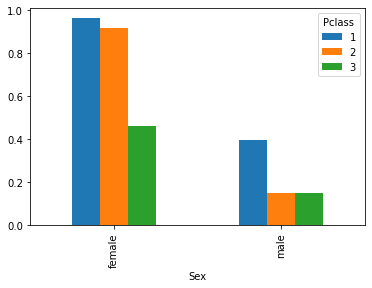

In [46]:
ttn_age.pivot_table(values='Survived',index='Sex',columns='Pclass').plot.bar()